In [5]:
import numpy as np
import pandas as pd

In [6]:
data = pd.read_csv('Social_Network_Ads.csv')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [8]:
features = data.iloc[:,[2,3]].values
label = data.iloc[:,4].values

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test = train_test_split(
    features,
    label,
    test_size=0.2,
    random_state=1
)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [10]:
model.score(X_train,y_train),model.score(X_test,y_test)

(0.996875, 0.8)

In [11]:
# All DT models IN DEFAULT MODE tend to overfit. However we can try to generalize the model using
# the following strategies:
#
# 1. Play with the depth value where depth must be greater than equal to 3 (Guideline)
# 2. Tweak the criterion
# 3. Use Bagging algorithm


In [12]:
?DecisionTreeClassifier

In [13]:
#criterion : {"gini", "entropy", "log_loss"}
#max_depth : int

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test = train_test_split(
    features,
    label,
    test_size=0.2,
    random_state=10
)

model1 = DecisionTreeClassifier(criterion="gini",max_depth = 3)
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [15]:
model1.score(X_train,y_train),model1.score(X_test,y_test)

(0.9125, 0.925)

In [16]:
#Visualizing DT

[Text(0.5, 0.875, 'age <= 42.5\ngini = 0.46\nsamples = 320\nvalue = [205, 115]\nclass = 0'),
 Text(0.25, 0.625, 'estimatedsalary <= 90500.0\ngini = 0.277\nsamples = 229\nvalue = [191, 38]\nclass = 0'),
 Text(0.125, 0.375, 'age <= 36.5\ngini = 0.079\nsamples = 193\nvalue = [185, 8]\nclass = 0'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 135\nvalue = [135, 0]\nclass = 0'),
 Text(0.1875, 0.125, 'gini = 0.238\nsamples = 58\nvalue = [50, 8]\nclass = 0'),
 Text(0.375, 0.375, 'estimatedsalary <= 117500.0\ngini = 0.278\nsamples = 36\nvalue = [6, 30]\nclass = 1'),
 Text(0.3125, 0.125, 'gini = 0.42\nsamples = 20\nvalue = [6, 14]\nclass = 1'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]\nclass = 1'),
 Text(0.75, 0.625, 'age <= 46.5\ngini = 0.26\nsamples = 91\nvalue = [14, 77]\nclass = 1'),
 Text(0.625, 0.375, 'estimatedsalary <= 35500.0\ngini = 0.455\nsamples = 20\nvalue = [7, 13]\nclass = 1'),
 Text(0.5625, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = 1'),
 Te

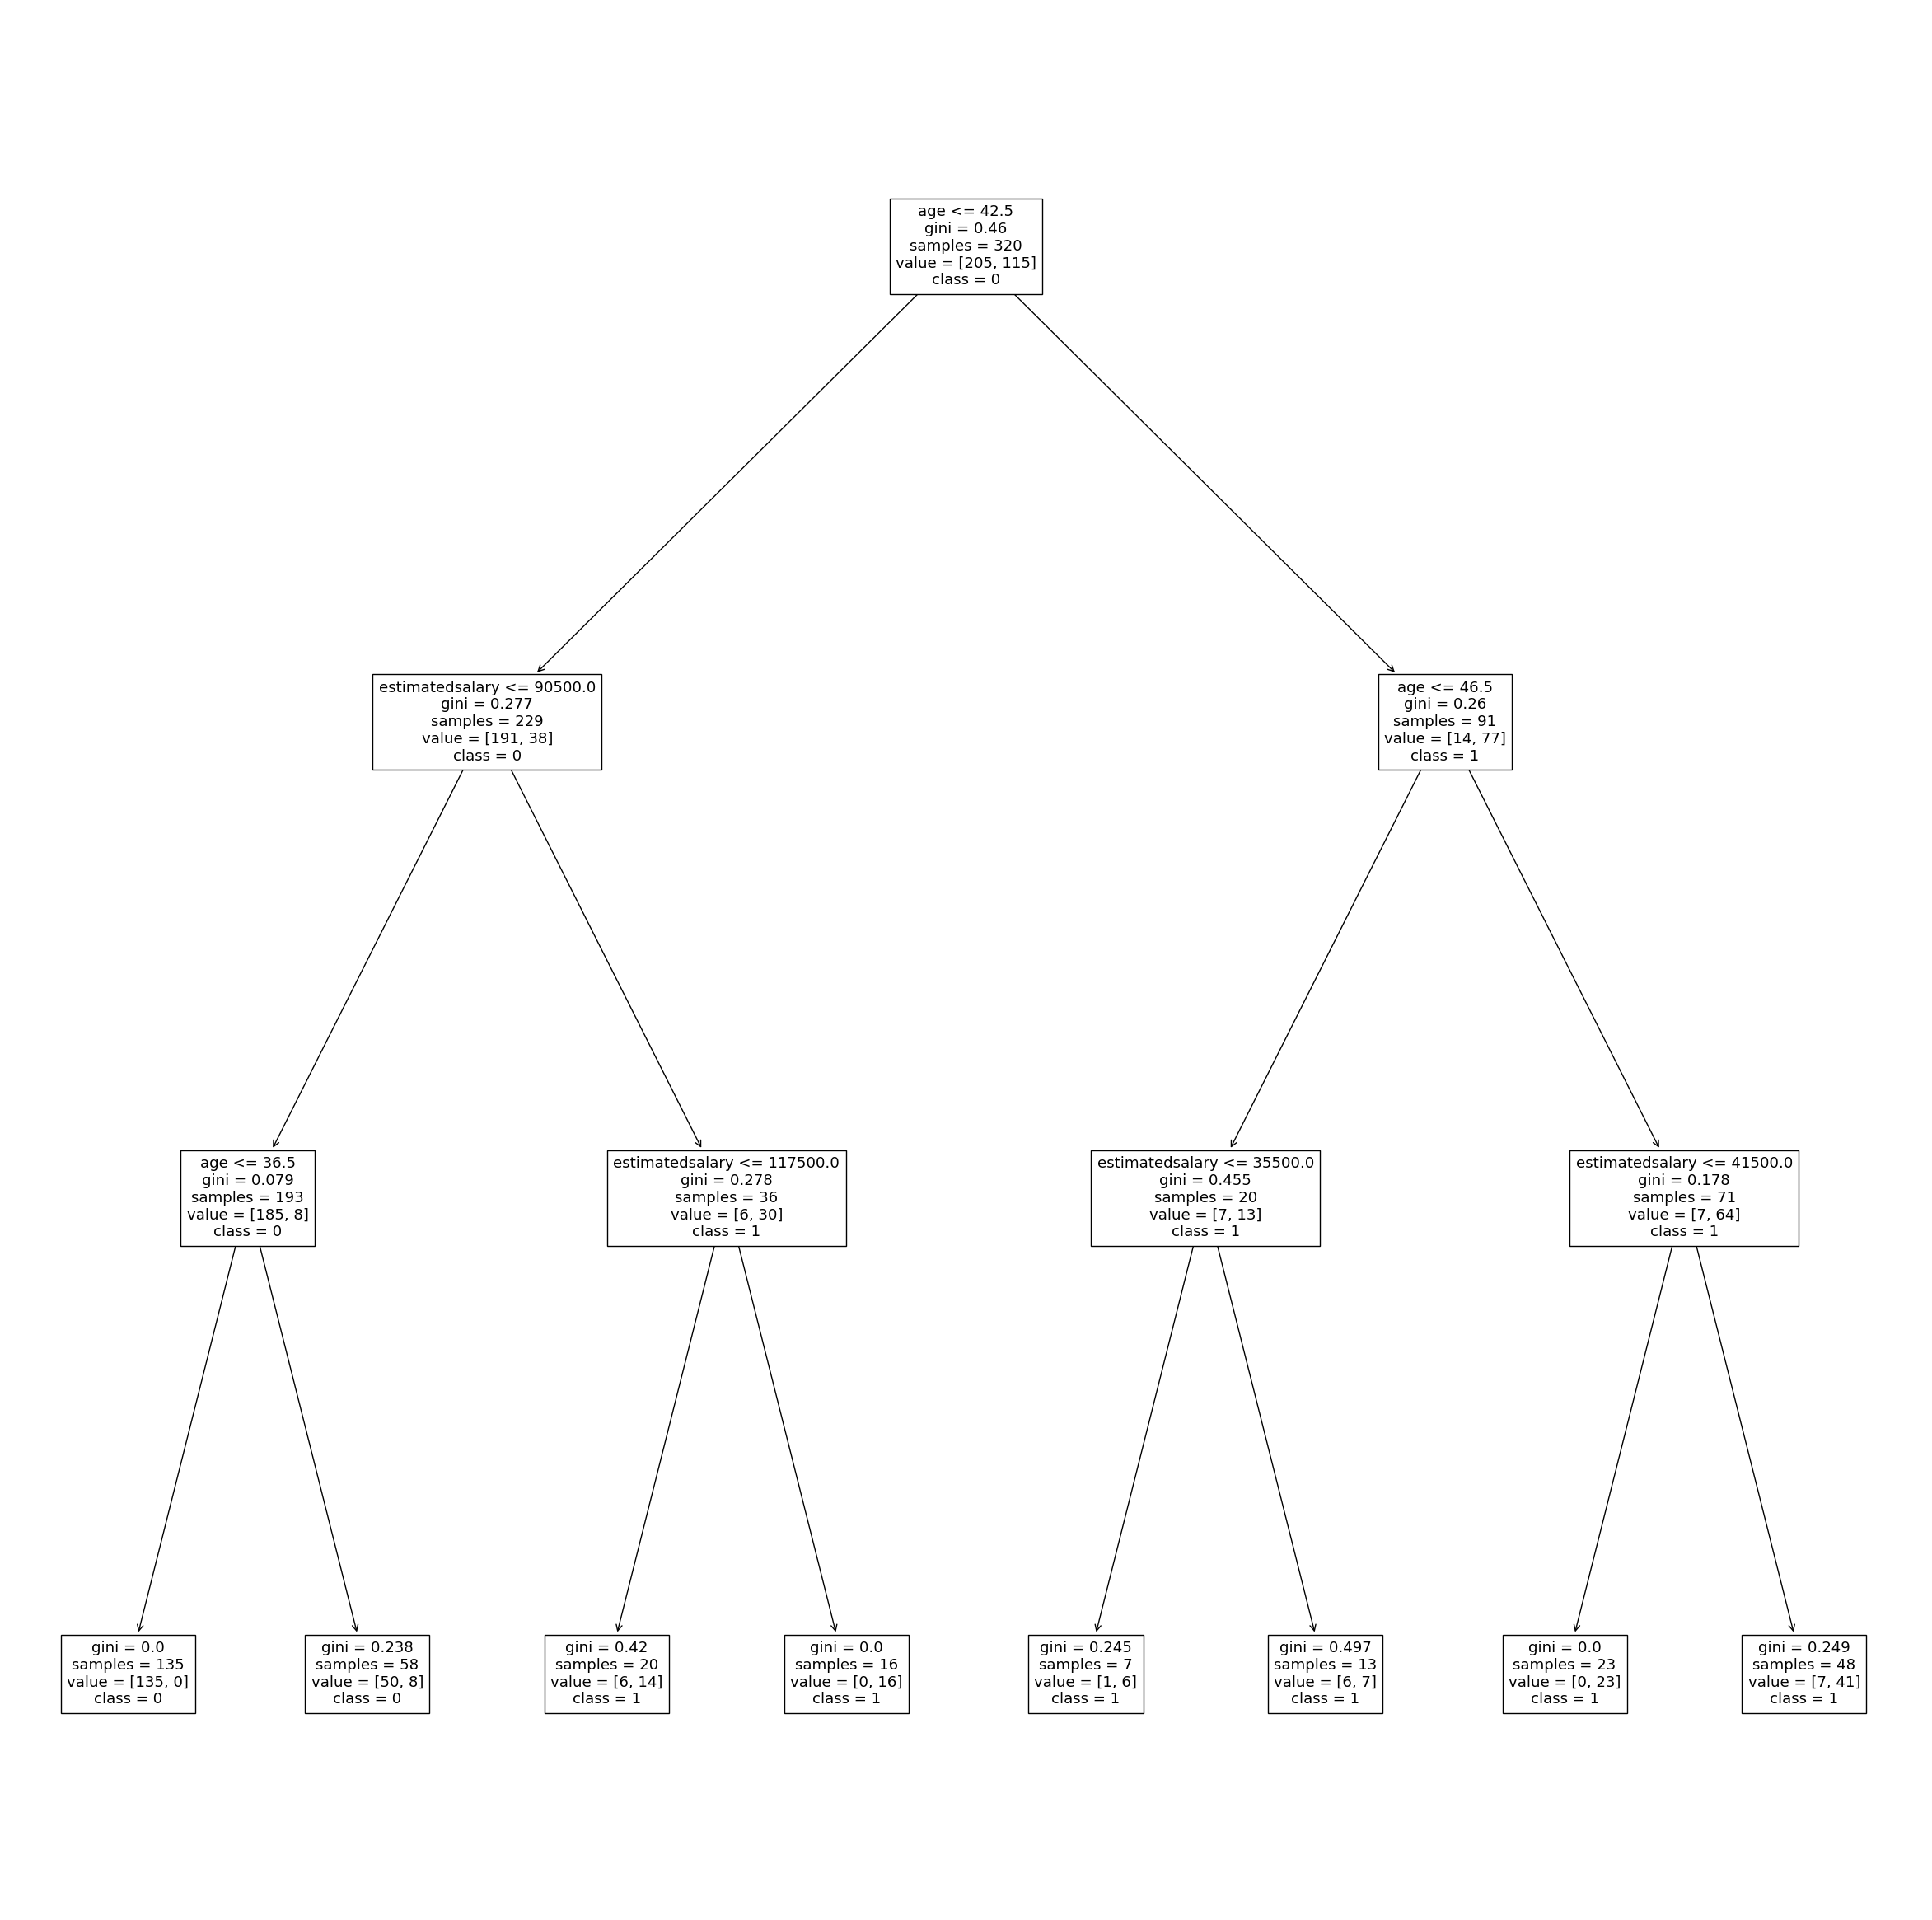

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))

plot_tree(model1,
          feature_names=['age','estimatedsalary'],
          class_names=['0','1'])

In [36]:
#To identify which features to preserve
# Guidelines - Eliminate those features that have value <= 0.2 to 0.3

#Which ever feature has the highest value shall be the root node
# In this case age is having the highest value

model1.feature_importances_

array([0.60732434, 0.39267566])

In [38]:
data.iloc[:,[2,3]].columns[model1.feature_importances_.argmax()]

'Age'